In [1]:
# Data processing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Preprocessing and transformation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, PowerTransformer
from scipy.stats import zscore

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the Excel file
file_path = "Stock Markets, US$.xlsx"
sheet_data = pd.read_excel(file_path, sheet_name=None)

# Extract the 'monthly' sheet
monthly_data = sheet_data["monthly"]

# Display first few rows
monthly_data.head()


,Unnamed: 0,United Arab Emirates,Argentina,Australia,Austria,Belgium,Bulgaria,Bahrain,Bosnia and Herzegovina,Brazil,...,Thailand,Tunisia,Turkey,"Taiwan, China",Uganda,Ukraine,United States,"Venezuela, RB",Viet Nam,South Africa
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995M02,NaN,NaN,31.15980,33.94037,47.86097,NaN,NaN,NaN,10.317820,...,234.1935,NaN,18.17587,97.89078,NaN,NaN,37.75788,NaN,NaN,NaN
2,1995M03,NaN,NaN,31.41283,35.23495,48.07164,NaN,NaN,NaN,8.566383,...,221.6557,NaN,22.08201,97.82407,NaN,NaN,38.79941,NaN,NaN,NaN
3,1995M04,NaN,NaN,33.12235,34.79140,51.56295,NaN,NaN,NaN,9.498071,...,217.9669,NaN,30.11485,95.91896,NaN,NaN,40.40268,NaN,NaN,NaN
4,1995M05,NaN,NaN,33.36655,36.28554,54.00761,NaN,NaN,NaN,11.431370,...,246.1551,NaN,29.70614,88.11889,NaN,NaN,41.93938,NaN,NaN,NaN


In [3]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              360 non-null    object 
 1   United Arab Emirates    222 non-null    float64
 2   Argentina               349 non-null    float64
 3   Australia               360 non-null    float64
 4   Austria                 360 non-null    float64
 5   Belgium                 360 non-null    float64
 6   Bulgaria                292 non-null    float64
 7   Bahrain                 230 non-null    float64
 8   Bosnia and Herzegovina  185 non-null    float64
 9   Brazil                  360 non-null    float64
 10  Canada                  360 non-null    float64
 11  Switzerland             360 non-null    float64
 12  Chile                   360 non-null    float64
 13  China                   229 non-null    float64
 14  Colombia                179 non-null    fl

In [4]:
monthly_data.describe()

,United Arab Emirates,Argentina,Australia,Austria,Belgium,Bulgaria,Bahrain,Bosnia and Herzegovina,Brazil,Canada,...,Thailand,Tunisia,Turkey,"Taiwan, China",Uganda,Ukraine,United States,"Venezuela, RB",Viet Nam,South Africa
count,222.000000,349.000000,360.000000,360.000000,360.000000,292.000000,230.000000,185.000000,360.000000,360.000000,...,360.000000,325.000000,360.000000,360.000000,251.000000,327.000000,360.000000,8.300000e+01,295.000000,272.000000
mean,182.302117,3861.264253,82.020928,77.969665,100.741371,113.828284,110.344372,54.670237,47.105750,89.013563,...,141.976084,62.572420,61.069936,116.179778,109.662150,53.029691,155.679756,1.358455e+01,115.183177,96.901312
std,65.939553,14334.326388,31.410140,36.589364,27.526941,71.718299,29.955174,22.865055,26.931575,36.389182,...,73.639437,25.190762,29.200365,52.985670,30.320173,61.618010,91.105258,1.133720e+02,55.455132,28.240222
min,79.294730,9.363043,31.159800,25.548830,47.860970,10.530520,71.478600,21.843160,6.278068,26.245310,...,25.283260,22.869680,14.533650,43.078990,46.687670,6.206654,37.757880,1.360000e-07,26.306830,24.023170
25%,122.402225,33.052110,44.207990,40.036007,76.949465,80.678398,89.302402,34.430100,21.446008,50.716130,...,72.992342,31.028710,37.895472,80.353278,88.815495,14.731350,96.274325,1.025000e-04,72.063795,85.448740
50%,187.295050,100.000000,93.455540,78.601165,104.122550,100.916300,99.704390,43.587250,48.674880,99.831560,...,161.774650,71.567570,58.781220,102.981900,109.395200,25.065820,115.948450,1.362000e-02,100.920300,105.885200
75%,231.749825,1151.602000,106.649050,99.560388,115.769000,129.688425,131.855400,76.214090,64.456715,113.425025,...,209.869750,80.677530,82.925463,130.357575,128.982650,67.784955,206.894925,1.418005e-01,156.297950,116.579125
max,341.512800,115350.800000,135.722600,183.340900,176.503600,442.620200,196.190800,116.772500,111.320700,160.089700,...,261.098600,113.271400,133.187600,282.045400,178.743200,296.242500,417.495400,1.032674e+03,255.254600,134.268400


In [5]:
# Rename the first column to 'Report_Month'
monthly_data.rename(columns={monthly_data.columns[0]: "Report_Month"}, inplace=True)

# Convert Report_Month from 'YYYYMmm' format to datetime
monthly_data["Report_Month"] = pd.to_datetime(monthly_data["Report_Month"], format="%YM%m", errors="coerce")

# Confirm date conversion
monthly_data["Report_Month"].head()


,Report_Month
0,NaT
1,1995-02-01
2,1995-03-01
3,1995-04-01
4,1995-05-01


In [6]:
# Use SimpleImputer to fill missing values (excluding date column)
imputer = SimpleImputer(strategy="mean")
monthly_data.iloc[:, 1:] = imputer.fit_transform(monthly_data.iloc[:, 1:])

# Check for any remaining missing values
monthly_data.isna().sum().sum()


np.int64(1)

In [7]:
# Remove duplicate rows if any
monthly_data.drop_duplicates(inplace=True)

# Confirm shape
monthly_data.shape


(361, 79)

In [8]:
# Calculate z-scores for all numerical columns
z_scores = np.abs(zscore(monthly_data.iloc[:, 1:], nan_policy='omit'))

# Keep rows where all z-scores are < 3
monthly_clean = monthly_data[(z_scores < 3).all(axis=1)].copy()

# Confirm shape after outlier removal
monthly_clean.shape


(293, 79)

In [9]:
# Initialize scaler and transformer
scaler = RobustScaler()
transformer = PowerTransformer(method="yeo-johnson")

# Apply scaling and transformation
monthly_clean.iloc[:, 1:] = transformer.fit_transform(scaler.fit_transform(monthly_clean.iloc[:, 1:]))

# Preview transformed data
monthly_clean.head()


,Report_Month,United Arab Emirates,Argentina,Australia,Austria,Belgium,Bulgaria,Bahrain,Bosnia and Herzegovina,Brazil,...,Thailand,Tunisia,Turkey,"Taiwan, China",Uganda,Ukraine,United States,"Venezuela, RB",Viet Nam,South Africa
0,NaT,0.172595,1.740469,0.058244,0.290952,0.243081,0.389999,0.444287,0.02258,0.256065,...,-0.077344,-0.066015,0.269243,0.511655,-0.053063,0.63237,0.533228,0.491452,0.372068,-0.169324
1,1995-02-01,0.172595,1.740469,-1.414232,-1.240938,-1.969363,0.389999,0.444287,0.02258,-1.419017,...,1.259462,-0.066015,-1.563463,0.023256,-0.053063,0.63237,-2.324907,0.491452,0.372068,-0.169324
2,1995-03-01,0.172595,1.740469,-1.407931,-1.193149,-1.960406,0.389999,0.444287,0.02258,-1.512911,...,1.062223,-0.066015,-1.362582,0.021222,-0.053063,0.63237,-2.283140,0.491452,0.372068,-0.169324
3,1995-04-01,0.172595,1.740469,-1.365154,-1.209506,-1.812098,0.389999,0.444287,0.02258,-1.462816,...,1.005046,-0.066015,-0.969703,-0.037791,-0.053063,0.63237,-2.219469,0.491452,0.372068,-0.169324
4,1995-05-01,0.172595,1.740469,-1.359014,-1.154474,-1.708403,0.389999,0.444287,0.02258,-1.359939,...,1.451708,-0.066015,-0.989022,-0.297280,-0.053063,0.63237,-2.159151,0.491452,0.372068,-0.169324


In [10]:
# Set 'Report_Month' as index for time series modeling
monthly_clean.set_index("Report_Month", inplace=True)

# Confirm index
monthly_clean.index


DatetimeIndex([       'NaT', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Report_Month', length=293, freq=None)

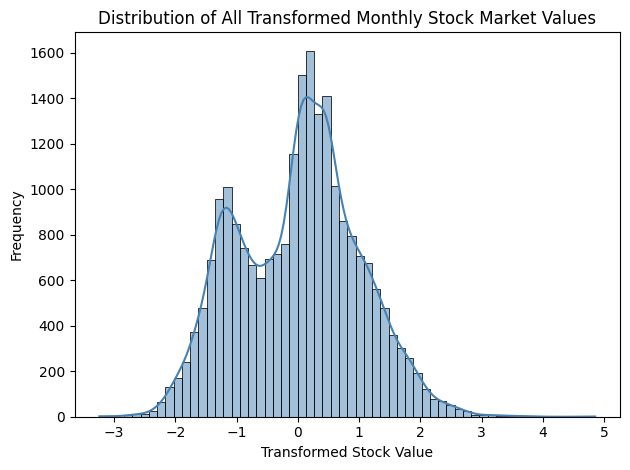

In [11]:
# Flatten all country columns into a single series for distribution view
all_values = monthly_clean.drop(columns=["Report_Month"], errors="ignore").stack()

sns.histplot(all_values, bins=60, kde=True, color='steelblue')
plt.title("Distribution of All Transformed Monthly Stock Market Values")
plt.xlabel("Transformed Stock Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



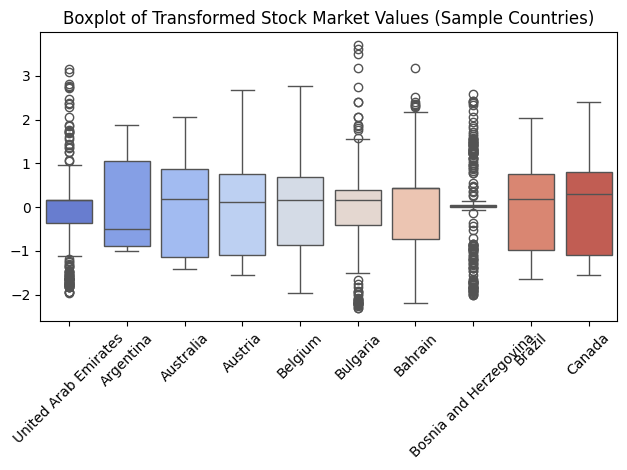

In [12]:
# Pick a sample of 10 countries to visualize spread and outliers
sample_countries = monthly_clean.columns[:10]  # or use `.sample(10)` for random selection

sns.boxplot(data=monthly_clean[sample_countries], palette="coolwarm")
plt.title("Boxplot of Transformed Stock Market Values (Sample Countries)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


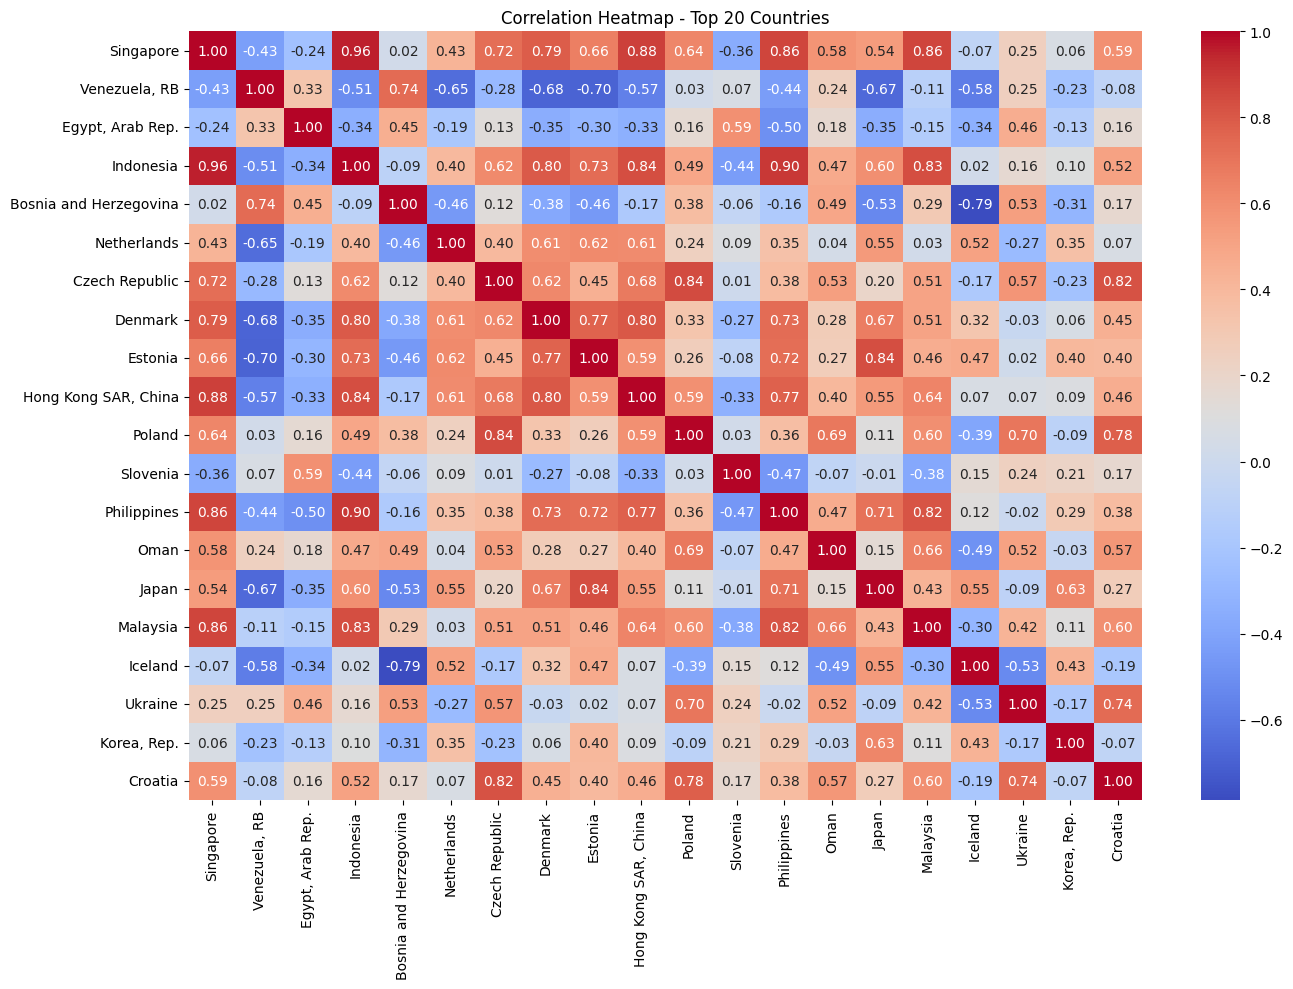

In [13]:
# Compute correlation matrix
corr_matrix = monthly_clean.corr()

# Select top 20 countries with highest average values
top_corr_countries = monthly_clean.mean().sort_values(ascending=False).head(20).index
top_corr_data = monthly_clean[top_corr_countries]

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(top_corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Top 20 Countries")
plt.tight_layout()
plt.show()
